<a href="https://colab.research.google.com/github/fiza-azam/Advanced-Computer-Vision/blob/main/Traffic_Signs_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Steps</h2>
1. Extract SIFT key points of all the images in the train set and obtain feature descriptor of them <br>
2. Cluster feature descriptor of the train set using K-means Clustering Algorithm <br>
3. Implement Bag of Features to Obtain the numric vector representation of each image<br>
4. Extract SIFT key points and descriptor of each image of the train set and cluster them by the clusters obtained in the 2nd step, moreover generate their numric vector representation using Bag of Features<br>
5. Similaryly, by using SIFT obtain key point and descriptor of each image in the test set <br>
6. Obtain Bag of Feature reperesentation of each image in the test set <br>
7. Prepare data for Classification i.e. BOF reperesentation of test and train set along with their labels<br>
8. Apply Support Vector machine on the data prepapred in the previous step <br>
9. Print accuracy of the algorithm

In [1]:
! pip uninstall opencv-python -y
! pip uninstall opencv-contrib-python -y
! pip install opencv-python==3.4.11.45
! pip install opencv-contrib-python==3.4.11.45
! pip install tqdm

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 49.1 MB 121 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 54.7 MB 55.1 MB/s 


#Libraries used for the project

In [2]:
import cv2
import numpy as np
import os
import pandas as pd

import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#Data Manipulation and Structuring


In [3]:
#Directory Structure
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))
            
list_files('/content/drive/MyDrive/TFS')

TFS/
    Testing/
        01/
            00025_00000.ppm
            00025_00001.ppm
            00025_00002.ppm
            00029_00000.ppm
            00029_00001.ppm
            00029_00002.ppm
            00079_00000.ppm
            00079_00001.ppm
            00079_00002.ppm
            00136_00000.ppm
            00136_00001.ppm
            00136_00002.ppm
            00143_00000.ppm
            00143_00001.ppm
            00143_00002.ppm
            00455_00000.ppm
            00455_00001.ppm
            00455_00002.ppm
            00468_00000.ppm
            00468_00001.ppm
        02/
            00001_00000.ppm
            00001_00001.ppm
            00001_00002.ppm
            00018_00000.ppm
            00018_00001.ppm
            00018_00002.ppm
            00028_00000.ppm
            00028_00001.ppm
            00028_00002.ppm
            00192_00000.ppm
            00192_00001.ppm
            00192_00002.ppm
            00927_00000.ppm
            00927_00001.ppm
      

In [4]:
#Get Folder List
path_train = "/content/drive/MyDrive/TFS/Training"
dir_list_train = os.listdir(path_train)
print(dir_list_train)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '010']


In [5]:
#Forming Image dictionary for test data: saving folder names as keys and images in them as items
def img_Dictionary(dict, dir_list, path):
    for folder in dir_list:
      image_list = os.listdir(path+'/'+folder)
      dict[folder] = image_list

In [6]:
#Train Dicitionary
img_dict =  {}
img_Dictionary(img_dict, dir_list_train, path_train)
img_dict

{'01': ['00468_00002.ppm',
  '00475_00000.ppm',
  '00475_00001.ppm',
  '00475_00002.ppm',
  '00801_00000.ppm',
  '00801_00001.ppm',
  '00801_00002.ppm',
  '00806_00000.ppm',
  '00806_00001.ppm',
  '00806_00002.ppm',
  '00874_00000.ppm',
  '00874_00001.ppm',
  '00874_00002.ppm',
  '00876_00000.ppm',
  '00876_00001.ppm',
  '00876_00002.ppm',
  '00877_00000.ppm',
  '00877_00001.ppm',
  '00877_00002.ppm',
  '00881_00000.ppm',
  '00881_00001.ppm',
  '00881_00002.ppm',
  '00897_00000.ppm',
  '00897_00001.ppm',
  '00897_00002.ppm',
  '00900_00000.ppm',
  '00900_00001.ppm',
  '00900_00002.ppm',
  '00920_00000.ppm',
  '00920_00001.ppm',
  '00920_00002.ppm',
  '00921_00000.ppm',
  '00921_00001.ppm',
  '00933_00000.ppm',
  '00933_00001.ppm',
  '00933_00002.ppm',
  '00941_00000.ppm',
  '00941_00001.ppm',
  '00941_00002.ppm',
  '00947_00000.ppm',
  '00947_00001.ppm',
  '00947_00002.ppm',
  '00965_00000.ppm',
  '00965_00001.ppm',
  '00965_00002.ppm',
  '01028_00000.ppm',
  '01028_00001.ppm',
  '0102

In [7]:
#Forming Dictionary for Test Data
path_test = "/content/drive/MyDrive/TFS/Testing"
dir_list_test = os.listdir(path_test)
print(dir_list_test)

img_dict_test =  {}

img_Dictionary(img_dict_test, dir_list_test, path_test)
img_dict_test

['01', '02', '03', '04', '05', '06', '07', '08', '09', '010']


{'01': ['00025_00000.ppm',
  '00025_00001.ppm',
  '00025_00002.ppm',
  '00029_00000.ppm',
  '00029_00001.ppm',
  '00029_00002.ppm',
  '00079_00000.ppm',
  '00079_00001.ppm',
  '00079_00002.ppm',
  '00136_00000.ppm',
  '00136_00001.ppm',
  '00136_00002.ppm',
  '00143_00000.ppm',
  '00143_00001.ppm',
  '00143_00002.ppm',
  '00455_00000.ppm',
  '00455_00001.ppm',
  '00455_00002.ppm',
  '00468_00000.ppm',
  '00468_00001.ppm'],
 '010': ['00022_00000.ppm',
  '00022_00001.ppm',
  '00022_00002.ppm',
  '00030_00000.ppm',
  '00030_00001.ppm',
  '00448_00000.ppm',
  '00448_00001.ppm',
  '00448_00002.ppm',
  '00452_00000.ppm',
  '00452_00002.ppm',
  '00460_00000.ppm',
  '00460_00001.ppm',
  '00460_00002.ppm',
  '00464_00000.ppm',
  '00464_00001.ppm',
  '00464_00002.ppm',
  '00479_00000.ppm',
  '00479_00001.ppm',
  '00525_00000.ppm',
  '00525_00001.ppm'],
 '02': ['00001_00000.ppm',
  '00001_00001.ppm',
  '00001_00002.ppm',
  '00018_00000.ppm',
  '00018_00001.ppm',
  '00018_00002.ppm',
  '00028_0000

#Method Defintions

In [8]:
#Fucntion for creating SIFT keypoints and Features
def CalcFeatures(img, thresh):
  sift = cv2.xfeatures2d.SIFT_create(thresh)
  kp, des = sift.detectAndCompute(img, None)
  return des

In [9]:
#Function to extract keypoints and descriptors of the train set
def TrainFeatures(thresh):
  features = []
  for key, value in img_dict.items():
      for val in value:
        img = cv2.imread(path_train+'/'+key+'/'+val, 0)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
          features.append(img_des)
  features = np.vstack(features)
  return features
        

In [10]:
#Kmeans clustering with 400 cluster centers 
def kmeans(features):
  k = 400
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)
  return centres

In [11]:
#Bag of Features to represent each image using vector of numbers
def bag_of_features(features, centres, k):
  vec = np.zeros((1, k)) #1x400 np array
  for i in range(features.shape[0]): 
    feat = features[i]
    diff = np.tile(feat, (k, 1)) - centres
    dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
    idx_dist = dist.argsort() #reorder elements in ascending order and returns their index
    idx = idx_dist[0] #index of first element
    vec[0][idx] += 1 
  return vec

In [12]:
#Applying Bag Of Features on the Training data
def BOW_Train(centers, k, thresh):
  labels = []
  vec = []

  for key, value in img_dict.items():
      for val in value:
        img = cv2.imread(path_train+'/'+key+'/'+val, 0)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
          img_vec = bag_of_features(img_des, centers, k)
          vec.append(img_vec)
          labels.append(key)
  vec = np.vstack(vec)
  return labels, vec


In [13]:
#Applying Bag Of Features  on the Test Data
def BOW_Test(centers, k, thresh):
  labelsTest = []
  vecT = []
  
  for key, value in img_dict_test.items():
      for val in value:
        img = cv2.imread(path_test+'/'+key+'/'+val, 0)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
          img_vec = bag_of_features(img_des, centers, k)
          vecT.append(img_vec)
          labelsTest.append(key)
  vecT = np.vstack(vecT)
  return labelsTest, vecT
  

In [14]:
#A function for training Support Vector Machine algorithm
def SVM(Xtrain, X_test, y_train, y_test):
  X_train = vec
  X_test = vecTest
  y_train = labels
  y_test = labelsTest

  clf = SVC()
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)

  return pred

In [16]:
def plotConfusionMatrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)
  ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j], fmt),
               ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  return ax

In [17]:
# A function to compute the metrics of the model
def metrics(pred, y_test):
  acc = accuracy_score(y_test, pred)
  conf_mat = confusion_matrix(y_test, pred)
  precision = precision_score(y_test, pred, average='micro')
  recall = recall_score(y_test, pred, average='micro')
  f1 = f1_score(y_test, pred, average='micro')

  print(conf_mat)
  print("Accuracy: "+str(acc*100))
  print("Precision: "+str(precision))
  print("Recall: "+str(recall))
  print("F1 Score: "+str(f1))

  class_names = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '010']
  plotConfusionMatrix(y_test, pred, classes=class_names)
  plt.show()


#Experimental Results

Experiment #1 <br>
K = 400 and Threshold = 5

In [42]:
features = TrainFeatures(5)

In [43]:
centers = kmeans(features)

In [44]:
labels, vec = BOW_Train(centers, 400, 5)

In [45]:
labelsTest, vecTest = BOW_Test(centers, 400, 5)

In [46]:
predictions = SVM(vec, vecTest, labels, labelsTest)

[[13  4  0  0  0  0  3  0  0  0]
 [ 0 16  0  0  0  0  1  2  1  0]
 [ 0  0 19  0  0  0  1  0  0  0]
 [ 0  0  0 17  0  0  2  1  0  0]
 [ 0  1  0  0 19  0  0  0  0  0]
 [ 0  7  0  0  0 12  1  0  0  0]
 [ 0  1  0  0  0  1 15  3  0  0]
 [ 0  1  0  0  0  0  3 16  0  0]
 [ 0  2  0  0  0  0  1  2 15  0]
 [ 0  0  0  0  0  0  0  1  0 19]]
Accuracy: 80.5
Precision: 0.805
Recall: 0.805
F1 Score: 0.805


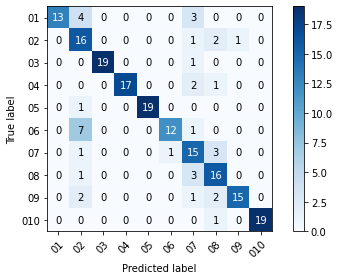

In [47]:
metrics(predictions, labelsTest)

Experiment #2 <br>
K = 400 and Threshold = 10

In [84]:
features = TrainFeatures(10)

In [85]:
centers = kmeans(features)

In [86]:
labels, vec = BOW_Train(centers, 400, 10)

In [87]:
labelsTest, vecTest = BOW_Test(centers, 400, 10)

In [88]:
predictions = SVM(vec, vecTest, labels, labelsTest)

[[13  6  0  0  0  0  1  0  0  0]
 [ 0 13  0  0  0  1  0  4  2  0]
 [ 0  1 19  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  1  2  0  0]
 [ 0  0  0  0 19  0  1  0  0  0]
 [ 0  4  0  0  0 15  0  1  0  0]
 [ 0  0  0  0  0  1 16  3  0  0]
 [ 0  1  0  0  0  0  0 19  0  0]
 [ 0  4  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0 20]]
Accuracy: 83.5
Precision: 0.835
Recall: 0.835
F1 Score: 0.835


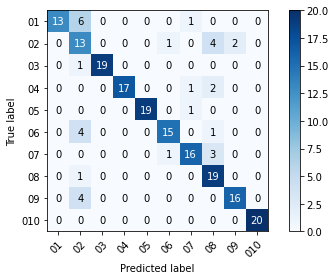

In [89]:
metrics(predictions, labelsTest)

Experiment #3 <br>
K = 400 and Threshold = 20

In [96]:
features = TrainFeatures(20)

In [97]:
centers = kmeans(features)

In [98]:
labels, vec = BOW_Train(centers, 400, 20)

In [99]:
labelsTest, vecTest = BOW_Test(centers, 400, 20)

In [100]:
predictions = SVM(vec, vecTest, labels, labelsTest)

[[15  2  0  0  0  0  3  0  0  0]
 [ 0 18  0  0  0  0  0  2  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  2 17  0  0  0  1  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  4  0  0  0 16  0  0  0  0]
 [ 0  3  0  0  0  0 14  3  0  0]
 [ 0  4  0  0  0  1  1 14  0  0]
 [ 0  4  0  0  0  0  0  3 13  0]
 [ 0  0  0  0  0  0  0  0  0 20]]
Accuracy: 83.5
Precision: 0.835
Recall: 0.835
F1 Score: 0.835


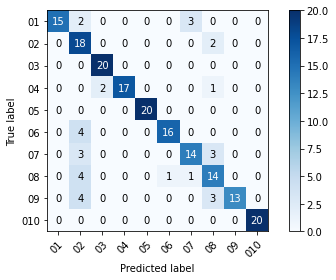

In [101]:
metrics(predictions, labelsTest)

Experiment #4 <br>
K = 400 and Threshold = 50

In [60]:
features = TrainFeatures(50)

In [61]:
centers = kmeans(features)

In [62]:
labels, vec = BOW_Train(centers, 400, 50)

In [63]:
labelsTest, vecTest = BOW_Test(centers, 400, 50)

In [64]:
predictions = SVM(vec, vecTest, labels, labelsTest)

[[16  0  0  0  0  2  1  0  1  0]
 [ 0 12  0  0  0  3  0  5  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  1  0 17  0  0  1  1  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  2  0  0  0 14  1  3  0  0]
 [ 2  1  0  0  0  1 14  2  0  0]
 [ 2  1  0  0  0  3  2 12  0  0]
 [ 0  3  0  0  0  0  1  1 15  0]
 [ 0  0  0  0  0  0  0  0  0 20]]
Accuracy: 80.0
Precision: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002


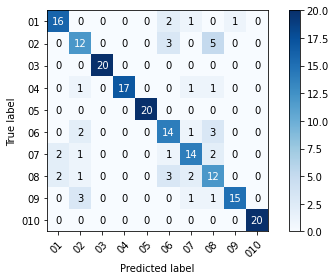

In [65]:
metrics(predictions, labelsTest)

#Conclusion <br>
It was observed that the results generated by setting the key points value to 10 and 20 generated high accuracy whereas the results obtained by setting the key point value to 50 generated accuracy lower than the other experiments.